## Step 1: Importing Libraries

In [ ]:
# Import necessary libraries for the project

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D
from tensorflow.keras.optimizers import Adam

# Processing and Visualization Tools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import datetime

## Step 1: Importing Libraries

In [ ]:
# Import necessary libraries for the project

from tensorflow.keras.datasets import fashion_mnist as dataset

## Step 2: Loading the Dataset

In [ ]:
# Load the dataset into memory
(X_train, y_train), (X_test, y_test) = dataset.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print("The shape of the X_train is {}".format( X_train.shape))
print("The shape of the y_train is {}".format(y_train.shape))
print("The shape of the X_test is {}".format(X_test.shape))
print("The shape of the y_test is {}".format(y_test.shape))

The shape of the X_train is (60000, 28, 28)
The shape of the y_train is (60000,)
The shape of the X_test is (10000, 28, 28)
The shape of the y_test is (10000,)


## Step 3: Visualizing Data/Results

The First Image has the label 9


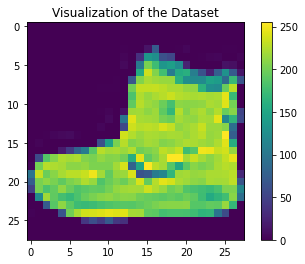

In [ ]:
# Display images and predictions

print("The First Image has the label {}".format(y_train[0]))
plt.imshow(X_train[0])
plt.colorbar()
plt.title('Visualization of the Dataset')
plt.show()

In [ ]:

X_train = X_train/255.0
X_test = X_test/ 255.0

## Step 4: Visualizing Data/Results

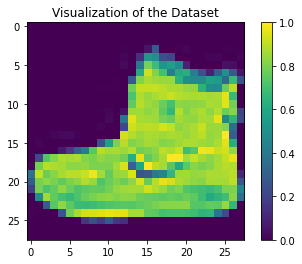

In [ ]:
# Display images and predictions

plt.imshow(X_train[0])
plt.colorbar()
plt.title('Visualization of the Dataset')
plt.show()

In [ ]:

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state=0)

In [ ]:
print("The shape of the X_train is {}".format(X_train.shape))
print("The shape of the y_train is {}".format(y_train.shape))
print("The shape of the X_valid is {}".format(X_valid.shape))
print("The shape of the y_valid is {}".format(y_valid.shape))

The shape of the X_train is (48000, 28, 28)
The shape of the y_train is (48000,)
The shape of the X_valid is (12000, 28, 28)
The shape of the y_valid is (12000,)


In [ ]:

X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_valid = X_valid.reshape(X_valid.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))

In [ ]:

print("The shape of the X_train is {}".format(X_train.shape))
print("The shape of the X_valid is {}".format(X_valid.shape))
print("The shape of the X_test is {}".format(X_test.shape))

The shape of the X_train is (48000, 28, 28, 1)
The shape of the X_valid is (12000, 28, 28, 1)
The shape of the X_test is (10000, 28, 28, 1)


## Step 5: Creating the Model

In [ ]:
# Define the neural network architecture


CNN_model = Sequential([
                        
                        Conv2D(filters=32,kernel_size=(3,3),
                               activation=tf.keras.layers.LeakyReLU(alpha=0.01),
                               kernel_initializer='he_normal',
                               input_shape=(28,28,1)),
                        MaxPool2D(pool_size=(2,2)),
                        Dropout(0.5),
                        Conv2D(filters=64,kernel_size=(3,3),
                               kernel_initializer='he_normal',
                               activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
                        MaxPool2D(pool_size=(2,2)),
                        Dropout(0.4),
                        Conv2D(filters=128,kernel_size=(3,3),
                               kernel_initializer='he_normal',
                               activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
                        MaxPool2D(pool_size=(2,2)),
                        Flatten(),
                        Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.001)),
                        Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.001)),
                        Dense(32, activation='relu'),
                        Dense(10, 'softmax')
])

## Step 6: Compiling the Model

In [ ]:
# Prepare the model for training by setting the loss function, optimizer, and metrics

loss_function = 'sparse_categorical_crossentropy'
LEARNING_RATE = 0.001
CNN_model.compile(
    loss = loss_function,
    optimizer = Adam(lr=LEARNING_RATE),
    metrics = ["accuracy"]
)

In [ ]:

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))


tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

## Step 7: Training the Model

In [ ]:
# Train the model on the training data
history = CNN_model.fit(x=X_train, 
            y=y_train, 
            epochs=100, 
            validation_data=(X_valid, y_valid), 
            callbacks=[tensorboard_callback])

Epoch 1/100
1500/1500 [==============================] - 17s 7ms/step - loss: 1.0710 - accuracy: 0.5904 - val_loss: 0.5874 - val_accuracy: 0.7906
Epoch 2/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5861 - accuracy: 0.7781 - val_loss: 0.4853 - val_accuracy: 0.8283
Epoch 3/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5040 - accuracy: 0.8113 - val_loss: 0.4267 - val_accuracy: 0.8468
Epoch 4/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4526 - accuracy: 0.8310 - val_loss: 0.4039 - val_accuracy: 0.8506
Epoch 5/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4240 - accuracy: 0.8431 - val_loss: 0.3671 - val_accuracy: 0.8655
Epoch 6/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3990 - accuracy: 0.8516 - val_loss: 0.3496 - val_accuracy: 0.8737
Epoch 7/100
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3901 - accuracy: 0.8565 - val_loss: 0.3521 -

## Step 8: Evaluating the Model

In [ ]:
# Assess the model's performance on the test data
score = CNN_model.evaluate(x=X_test, y=y_test, verbose=0)

In [ ]:
print("The loss on the test set is {}".format(score[0]))
print("The accuracy on the test set is {}".format(score[1]))

The loss on the test set is 0.29949358105659485
The accuracy on the test set is 0.8949999809265137
